In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sksurv.nonparametric import kaplan_meier_estimator
import seaborn as sns

## check if there are patients that changed their diagnosis with different visit
## checking out the data first
pheno = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DS_2022.09.27_GRU-IRB-PUB.csv')
pheno_dd = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Biomarker_DD_2022.09.27.csv')
cognition_DD = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DD_2022.09.27.csv')

In [98]:
print(pheno.dtypes)
pheno.describe()


Study             object
SUBJID            object
PHC_Visit          int64
PHC_Age           object
PHC_Diagnosis    float64
PHC_Sex            int64
PHC_Race           int64
PHC_Ethnicity    float64
PHC_Education    float64
PHC_MEM          float64
PHC_EXF          float64
PHC_LAN          float64
PHC_VSP          float64
dtype: object


,PHC_Visit,PHC_Diagnosis,PHC_Sex,PHC_Race,PHC_Ethnicity,PHC_Education,PHC_MEM,PHC_EXF,PHC_LAN,PHC_VSP
count,25824.000000,23833.000000,25824.000000,25824.000000,25765.000000,25765.000000,25708.000000,24866.000000,25569.000000,5101.000000
mean,3.980522,1.752948,1.549992,4.712787,1.894702,15.420027,0.143129,0.116859,0.263795,-0.059803
std,2.801403,0.823032,0.497504,0.782628,0.306943,3.378554,1.032140,0.835829,0.844929,0.493225
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-3.185000,-3.149000,-3.116000,-2.314000
25%,2.000000,1.000000,1.000000,5.000000,2.000000,13.000000,-0.589000,-0.414000,-0.214000,-0.333000
50%,3.000000,2.000000,2.000000,5.000000,2.000000,16.000000,0.284000,0.202000,0.343000,0.258000
75%,6.000000,2.000000,2.000000,5.000000,2.000000,18.000000,0.865000,0.715000,0.813000,0.264000
max,16.000000,3.000000,2.000000,6.000000,2.000000,27.000000,3.273000,2.744000,2.996000,0.483000


In [75]:
## Data exploration
print(len(pheno.SUBJID.unique()))

5300


In [3]:
cognition_DD

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,Given differences in visit codes across cohort...,NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_MEM,Harmonized Composite Memory Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pheno_dd

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,"See ""ADSP-PHC-Cognition_DD_2022.09.27.csv"" for...",NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character va...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_AB42,Harmonized Z-Score for AB42 Biomarker Levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'PHC_Visit'}>]], dtype=object)

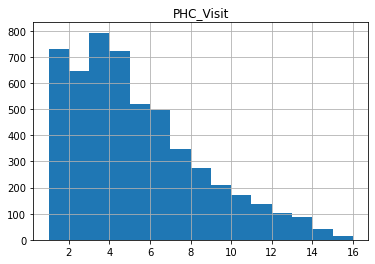

In [3]:
pd.DataFrame(pheno.groupby('SUBJID')['PHC_Visit'].max()).hist(bins=15)

## Data processing

1. binarize the non-binary diagnosis (PHC = 1,2 :control; PHC=3 : case)
* Note: There are no diagnosis that is 4 (NA) in PHC scale, so we can assign all non-phc-3 sample as controls.

2. convert age 90+ to 90
3. change ethnicity group types from numeral to string
4. change sex to 0,1

In [99]:
## how many nulls
print('\n%d of the samples dont have diagnosis'%len(pheno[pheno.PHC_Diagnosis.isnull()].SUBJID.unique()))

## remove rows without diagnosis
null_index = pheno[pheno.PHC_Diagnosis.isnull()].index
new_pheno = pheno.drop(null_index).loc[:,['SUBJID', 'PHC_Visit', 'PHC_Age', 'PHC_Diagnosis', 'PHC_Sex', 'PHC_Race']]


print('PHC Diagnosis 1-4')
print(new_pheno.PHC_Diagnosis.value_counts())
new_pheno['Diagnosis'] = new_pheno['PHC_Diagnosis'].apply(lambda x: 1 if x == 3 else 0) 

## check #case and #control
print('\nDiagnosis 0/1')
print(new_pheno.Diagnosis.value_counts())




1037 of the samples dont have diagnosis
PHC Diagnosis 1-4
1.0    11743
2.0     6235
3.0     5855
Name: PHC_Diagnosis, dtype: int64

Diagnosis 0/1
0    17978
1     5855
Name: Diagnosis, dtype: int64


In [100]:
# Age
new_pheno.loc[new_pheno['PHC_Age'] == '90+', 'PHC_Age'] = 90
new_pheno.PHC_Age = new_pheno.PHC_Age.astype('float')

## Change sex to 0 and 1
new_pheno["PHC_Sex"] = new_pheno.PHC_Sex-1

## Change ethnicity
ethnicity_dict = {1:'AMR',2:'ASIAN',3:'AFR', 4:'Islander',5:'EUR',6:'NAN'}
new_pheno["PHC_Race"] = new_pheno.PHC_Race.map(ethnicity_dict)

In [103]:
new_pheno

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.744011,1.0,1,AFR,0
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1
2,A-ADC-AD000003,3,71.676934,3.0,1,AFR,1
3,A-ADC-AD000007,1,69.998631,1.0,0,AFR,0
4,A-ADC-AD000007,2,71.063655,1.0,0,AFR,0
...,...,...,...,...,...,...,...
25819,G-ADNI-AN000321,2,71.132101,1.0,0,EUR,0
25820,G-ADNI-AN000321,3,73.218344,2.0,0,EUR,0
25821,G-ADNI-AN000321,4,74.212183,2.0,0,EUR,0
25822,G-ADNI-AN000309,1,75.613963,1.0,1,EUR,0


In [ ]:
## how many nulls
len(pheno[pheno.PHC_Diagnosis.isnull()].SUBJID.unique())

1037

In [57]:
len(pheno.SUBJID.unique())

5300

In [190]:
## extract the SUBJID and which visit does the diagnosis change.
## Extract samples with multiple visit
multi_visit = new_pheno[new_pheno.duplicated(subset=['SUBJID'], keep = False)]
changed_diag = multi_visit[~multi_visit.duplicated(subset=['SUBJID', 'Diagnosis'])] ## remove rows with the same diagnosis
changed_diag = changed_diag[changed_diag.duplicated(subset=['SUBJID'], keep = False)]


In [107]:
new_pheno[0:32]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.744011,1.0,1,AFR,0
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1
2,A-ADC-AD000003,3,71.676934,3.0,1,AFR,1
3,A-ADC-AD000007,1,69.998631,1.0,0,AFR,0
4,A-ADC-AD000007,2,71.063655,1.0,0,AFR,0
5,A-ADC-AD000007,3,72.068446,1.0,0,AFR,0
6,A-ADC-AD000007,4,73.054073,1.0,0,AFR,0
7,A-ADC-AD000007,5,74.381930,1.0,0,AFR,0
8,A-ADC-AD000274,1,63.693361,1.0,1,EUR,0
9,A-ADC-AD000274,2,64.706366,1.0,1,EUR,0


In [10]:
multi_visit.groupby('SUBJID')['PHC_Diagnosis'].max().value_counts()

3.0    1730
1.0    1480
2.0    1049
Name: PHC_Diagnosis, dtype: int64

array([[<AxesSubplot:title={'center':'PHC_Visit'}>]], dtype=object)

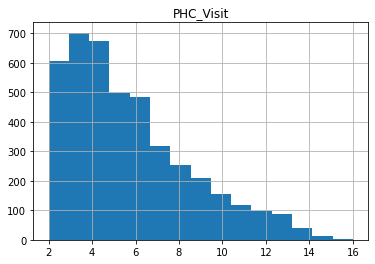

In [11]:
pd.DataFrame(multi_visit.groupby('SUBJID')['PHC_Visit'].max()).hist(bins=15)

In [118]:
multi_visit.isnull().values.any()

False

In [128]:
len(multi_visit.SUBJID.unique())


4259

In [108]:
multi_visit[(multi_visit.PHC_Diagnosis != 1) & (multi_visit.PHC_Diagnosis != 2) & (multi_visit.PHC_Diagnosis != 3)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis


In [53]:
multi_visit[multi_visit.PHC_Visit.isnull()]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis


In [110]:
new_pheno[new_pheno['SUBJID']=='A-ADC-AD000769']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
103,A-ADC-AD000769,1,75.942505,1.0,1,EUR,0
104,A-ADC-AD000769,2,77.034908,1.0,1,EUR,0
105,A-ADC-AD000769,3,78.012320,2.0,1,EUR,0
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1


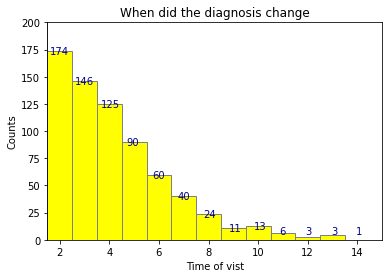

In [112]:
## noted that this analysis doesnt make much sense since it tracks visit time not actual time
bin_size = changed_diag.PHC_Visit.max() - changed_diag.PHC_Visit.min()
plt.hist(changed_diag.PHC_Visit, histtype='bar', color='yellow', edgecolor='grey', bins=bin_size, align = 'left')
plt.xlabel('Time of vist')
plt.ylabel('Counts')
plt.xlim(1.5,max(changed_diag.PHC_Visit)+1)
plt.ylim(0,math.ceil(changed_diag.PHC_Visit.value_counts()[2]/50)*50)
plt.title('When did the diagnosis change')
right_space = 0
for index, value in enumerate(changed_diag.PHC_Visit.value_counts(sort=False)[1:]):
    plt.text(index+ 1.6 + right_space, max(value-3,5), str(value), color='darkblue')
    right_space += 0.03

plt.show()

In [146]:
print(changed_diag.PHC_Visit.value_counts(sort=False)[1:])

2     174
3     146
4     125
5      90
6      60
7      40
8      24
9      11
10     13
11      6
12      3
13      3
14      1
Name: PHC_Visit, dtype: int64


In [185]:
changed_diag

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.744011,1.0,1,AFR,0
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1
103,A-ADC-AD000769,1,75.942505,1.0,1,EUR,0
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1
155,A-ADC-AD000786,1,76.260096,1.0,0,EUR,0
...,...,...,...,...,...,...,...
25309,G-ADNI-AN000293,4,82.655715,3.0,1,EUR,1
25450,G-ADNI-AN000358,1,76.996578,1.0,0,EUR,0
25453,G-ADNI-AN000358,4,78.995209,3.0,0,EUR,1
25790,G-ADNI-AN000316,1,71.756331,1.0,0,NAN,0


In [179]:
changed_diag.drop_duplicates(subset = ['SUBJID', 'PHC_Sex', 'PHC_Race','Diagnosis'])

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1
163,A-ADC-AD000786,9,84.262834,3.0,0,EUR,1
240,A-ADC-AD000805,5,90.000000,3.0,0,EUR,1
260,A-ADC-AD000817,6,90.000000,3.0,0,EUR,1
...,...,...,...,...,...,...,...
25212,G-ADNI-AN000177,6,78.398357,3.0,0,EUR,1
25299,G-ADNI-AN000196,3,71.682409,3.0,1,EUR,1
25309,G-ADNI-AN000293,4,82.655715,3.0,1,EUR,1
25453,G-ADNI-AN000358,4,78.995209,3.0,0,EUR,1


In [191]:
case = changed_diag.drop_duplicates(subset = ['SUBJID', 'PHC_Sex', 'PHC_Race'], keep = 'last')
case['time'] = changed_diag.groupby('SUBJID')['PHC_Age'].diff().dropna().values

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
case

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis,time
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1,0.933607
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1,3.427789
163,A-ADC-AD000786,9,84.262834,3.0,0,EUR,1,8.002738
240,A-ADC-AD000805,5,90.000000,3.0,0,EUR,1,0.000000
260,A-ADC-AD000817,6,90.000000,3.0,0,EUR,1,3.275838
...,...,...,...,...,...,...,...,...
25212,G-ADNI-AN000177,6,78.398357,3.0,0,EUR,1,4.799452
25299,G-ADNI-AN000196,3,71.682409,3.0,1,EUR,1,1.015743
25309,G-ADNI-AN000293,4,82.655715,3.0,1,EUR,1,2.050650
25453,G-ADNI-AN000358,4,78.995209,3.0,0,EUR,1,1.998631


In [189]:
changed_diag

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1
163,A-ADC-AD000786,9,84.262834,3.0,0,EUR,1
240,A-ADC-AD000805,5,90.000000,3.0,0,EUR,1
260,A-ADC-AD000817,6,90.000000,3.0,0,EUR,1
...,...,...,...,...,...,...,...
25212,G-ADNI-AN000177,6,78.398357,3.0,0,EUR,1
25299,G-ADNI-AN000196,3,71.682409,3.0,1,EUR,1
25309,G-ADNI-AN000293,4,82.655715,3.0,1,EUR,1
25453,G-ADNI-AN000358,4,78.995209,3.0,0,EUR,1


In [169]:
case

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis,time
0,A-ADC-AD000003,1,69.744011,1.0,1,AFR,0,0.933607
103,A-ADC-AD000769,1,75.942505,1.0,1,EUR,0,3.427789
155,A-ADC-AD000786,1,76.260096,1.0,0,EUR,0,8.002738
236,A-ADC-AD000805,1,90.000000,1.0,0,EUR,0,0.000000
255,A-ADC-AD000817,1,86.724162,1.0,0,EUR,0,3.275838
...,...,...,...,...,...,...,...,...
25207,G-ADNI-AN000177,1,73.598905,2.0,0,EUR,0,4.799452
25297,G-ADNI-AN000196,1,70.666667,2.0,1,EUR,0,1.015743
25306,G-ADNI-AN000293,1,80.605065,2.0,1,EUR,0,2.050650
25450,G-ADNI-AN000358,1,76.996578,1.0,0,EUR,0,1.998631


In [74]:
changed_diag[changed_diag.SUBJID =='A-ADC-AD000805']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
236,A-ADC-AD000805,1,90.0,1.0,1,5,0
240,A-ADC-AD000805,5,90.0,3.0,1,5,1


In [117]:
case.time.describe()

count    688.000000
mean       2.814314
std        2.187258
min        0.000000
25%        1.054073
50%        2.050650
75%        3.989049
max       13.051335
Name: time, dtype: float64

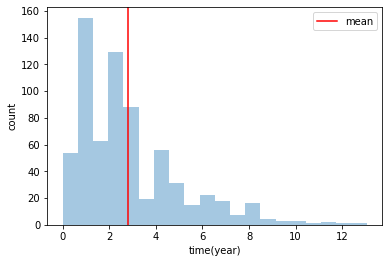

In [119]:
ax = sns.distplot(case.time, kde = False)
plt.axvline(x=case.time.mean(), color='red', label= 'mean')
plt.xlabel('time(year)')
plt.ylabel('count')
plt.legend(loc='upper right')


[Text(0.5, 0, 'Time(year)'), Text(0.5, 1.0, 'When did the diagnosis change')]

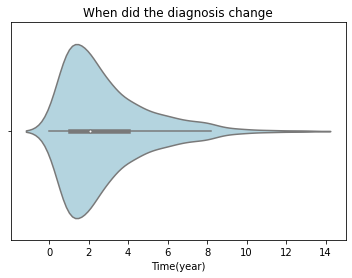

In [120]:
ax = sns.violinplot(x= case.time, color='lightblue')
ax.set(xlabel='Time(year)', title='When did the diagnosis change')

In [132]:
control = multi_visit[(~multi_visit.SUBJID.isin(case.SUBJID)) & (multi_visit.Diagnosis == 0)] 

In [137]:
71.0-69.99


1.0100000000000051

In [151]:
control.groupby('SUBJID')['PHC_Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SUBJID,,,,,,,,
A-ADC-AD000007,5.0,72.113347,1.703476,69.998631,71.063655,72.068446,73.054073,74.381930
A-ADC-AD000274,2.0,64.199863,0.716303,63.693361,63.946612,64.199863,64.453114,64.706366
A-ADC-AD000744,11.0,72.927634,3.390993,67.863107,70.398357,72.922656,75.452430,78.078029
A-ADC-AD000747,12.0,73.683322,4.253419,67.874059,70.472279,73.204654,76.283368,81.075975
A-ADC-AD000756,7.0,86.784394,2.125147,83.901437,85.262149,86.795346,88.261465,89.746749
...,...,...,...,...,...,...,...,...
G-ADNI-AN000762,3.0,72.267397,0.516405,71.786448,71.994524,72.202601,72.507871,72.813142
G-ADNI-AN000763,6.0,81.712982,1.068062,80.394251,81.008214,81.644079,82.236824,83.364819
G-ADNI-AN000774,5.0,72.337303,1.197658,71.003422,71.537303,72.109514,73.029432,74.006845


In [152]:
time=control.groupby('SUBJID')['PHC_Age'].max() - control.groupby('SUBJID')['PHC_Age'].min()
control = control.drop_duplicates(subset = ['SUBJID','Diagnosis'], keep = 'last')
control['time']=time.values

In [26]:
## needs to add controls
multi_visit[~multi_visit.SUBJID.isin(changed_diag.SUBJID)][1:20]  
multi_visit[(~multi_visit.SUBJID.isin(changed_diag.SUBJID)) & (multi_visit.Diagnosis == 0)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
3,A-ADC-AD000007,1,69.99863107,1.0,1,3,0
4,A-ADC-AD000007,2,71.06365503,1.0,1,3,0
5,A-ADC-AD000007,3,72.06844627,1.0,1,3,0
6,A-ADC-AD000007,4,73.05407255,1.0,1,3,0
7,A-ADC-AD000007,5,74.38193018,1.0,1,3,0
...,...,...,...,...,...,...,...
25819,G-ADNI-AN000321,2,71.1321013,1.0,1,5,0
25820,G-ADNI-AN000321,3,73.2183436,2.0,1,5,0
25821,G-ADNI-AN000321,4,74.21218344,2.0,1,5,0
25822,G-ADNI-AN000309,1,75.61396304,1.0,2,5,0


In [27]:
multi_visit[~multi_visit.SUBJID.isin(changed_diag.SUBJID)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
3,A-ADC-AD000007,1,69.99863107,1.0,1,3,0
4,A-ADC-AD000007,2,71.06365503,1.0,1,3,0
5,A-ADC-AD000007,3,72.06844627,1.0,1,3,0
6,A-ADC-AD000007,4,73.05407255,1.0,1,3,0
7,A-ADC-AD000007,5,74.38193018,1.0,1,3,0
...,...,...,...,...,...,...,...
25819,G-ADNI-AN000321,2,71.1321013,1.0,1,5,0
25820,G-ADNI-AN000321,3,73.2183436,2.0,1,5,0
25821,G-ADNI-AN000321,4,74.21218344,2.0,1,5,0
25822,G-ADNI-AN000309,1,75.61396304,1.0,2,5,0


In [28]:
new_pheno[new_pheno.SUBJID == 'A-ADC-AD000674']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
18,A-ADC-AD000674,2,86.45585216,3.0,2,5,1


In [193]:
case

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis,time
1,A-ADC-AD000003,2,70.677618,3.0,1,AFR,1,0.933607
106,A-ADC-AD000769,4,79.370294,3.0,1,EUR,1,3.427789
163,A-ADC-AD000786,9,84.262834,3.0,0,EUR,1,8.002738
240,A-ADC-AD000805,5,90.000000,3.0,0,EUR,1,0.000000
260,A-ADC-AD000817,6,90.000000,3.0,0,EUR,1,3.275838
...,...,...,...,...,...,...,...,...
25212,G-ADNI-AN000177,6,78.398357,3.0,0,EUR,1,4.799452
25299,G-ADNI-AN000196,3,71.682409,3.0,1,EUR,1,1.015743
25309,G-ADNI-AN000293,4,82.655715,3.0,1,EUR,1,2.050650
25453,G-ADNI-AN000358,4,78.995209,3.0,0,EUR,1,1.998631


In [199]:
pheno = pd.concat([control,case])
pheno.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_2022.09.27_processed.tsv', sep = '\t')